<a href="https://colab.research.google.com/github/SupermarketAutomationAI/data_processing/blob/main/coco_apple_banana_orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P '/root'

In [5]:
import zipfile

In [ ]:
zipfilename = '/root/annotations_trainval2017.zip'

trainval2017 = zipfile.ZipFile(zipfilename, 'r') 
count = 0
for file in trainval2017.namelist():
  print(file)
  if file.startswith('annotations/instances'):
    trainval2017.extract(file, '/root/train2017')

In [16]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [30]:
dataDir='/root/train2017'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
cocotrain = COCO(annFile)

loading annotations into memory...
Done (t=14.68s)
creating index...
index created!


In [31]:
# get all images containing given categories, select one at random
catIdsTrain = cocotrain.getCatIds(catNms=['apple','orange','banana']);
imgIdsTrain = cocotrain.getImgIds(catIds=catIds);

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image

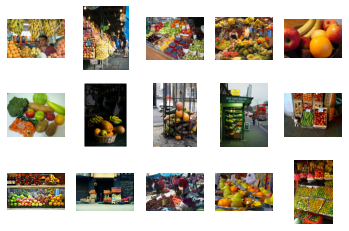

In [37]:
k = 0
for imageID in imgIdsTrain:
    img = cocotrain.loadImgs(imageID)[0]
    img = io.imread(img['coco_url'])
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)
    k += 1
    if k > 14:
        break

In [35]:
# load validation images
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
cocoval = COCO(annFile)
catIdsVal = cocoval.getCatIds(catNms=['apple','orange','banana']);
imgIdsVal = cocoval.getImgIds(catIds=catIds);

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


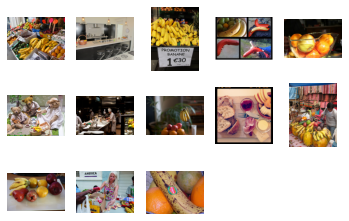

In [36]:
k = 0
for imageID in imgIdsVal:
    img = cocoval.loadImgs(imageID)[0]
    img = io.imread(img['coco_url'])
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(I)
    k += 1
    if k > 14:
        break